# Youtube Sentiment Analysis
### Made by Vivek.D.Manglani

### Project Info:
The Youtube Sentiment Analysis project is a Jupyter based Python notebook, which when given User IDs of Youtubers, extract their channel's statistical data as well as can provide with you video analytics. When provided with a video id(last characters in video's URL), the model can provide how impactful the video by reading its 100 comments.

# 1: Getting Basic Information

### 1.0 Importing Libraries

In [17]:
from googleapiclient.discovery import build

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
from ipywidgets import FloatProgress
sns.set_style("whitegrid")


### 2.0 Setting up API key and required channel information

In [18]:
api_key = 'AI.....xxxxx'
channel_ids = ['UCCWi3hpnq_Pe03nGxuS7isg', # CampusX
               'UC8butISFwT-Wl7EV0hUK0BQ', # FreeCodeCamp
               'UCJihyK0A38SZ6SdJirEdIOw', # GateSmashers
               'UCZknyXD-6tETm9aN8GQCi8g', #Ansh Mehra
               'UCsBjURrPoezykLs9EqgamOA' # Fireship
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

### 2.1 Function for Fetching Channel Statistics using their IDs

In [19]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

### 3.0 Fetching Data

In [20]:
channel_statistics = get_channel_stats(youtube, channel_ids)

### 3.1 Converting Data to Dataframe 

In [21]:
channel_data = pd.DataFrame(channel_statistics)

In [22]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Gate Smashers,1730000,404343305,1516,UUJihyK0A38SZ6SdJirEdIOw
1,freeCodeCamp.org,8890000,646560059,1564,UU8butISFwT-Wl7EV0hUK0BQ
2,Fireship,2710000,357946403,600,UUsBjURrPoezykLs9EqgamOA
3,CampusX,150000,15342768,1159,UUCWi3hpnq_Pe03nGxuS7isg
4,Ansh Mehra,314000,9897493,351,UUZknyXD-6tETm9aN8GQCi8g


### 3.1 Data manipulation

In [23]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

### 4: Visualization

### 4.1 Subscriber Count

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


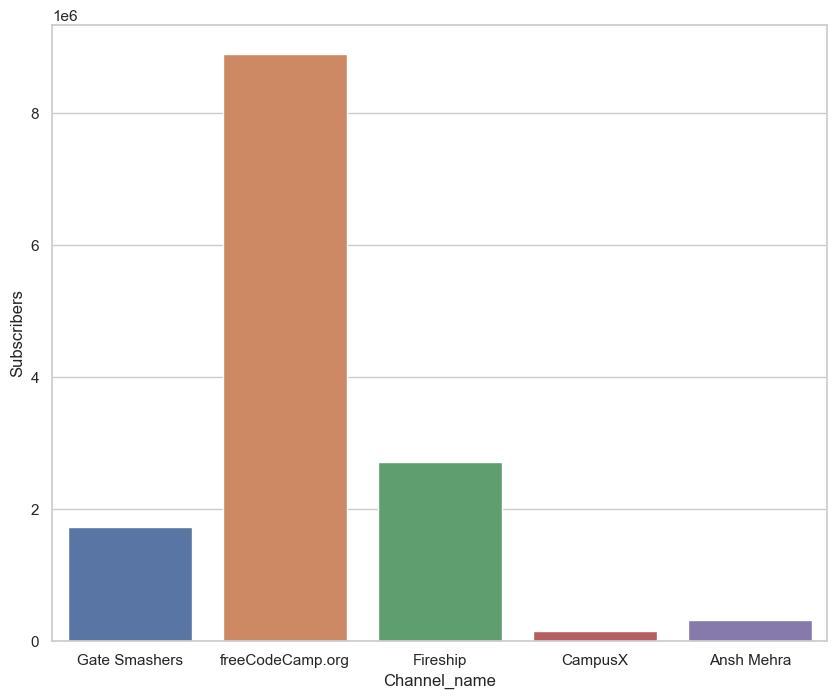

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)
plt.show()

### 4.2 Channel Views

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


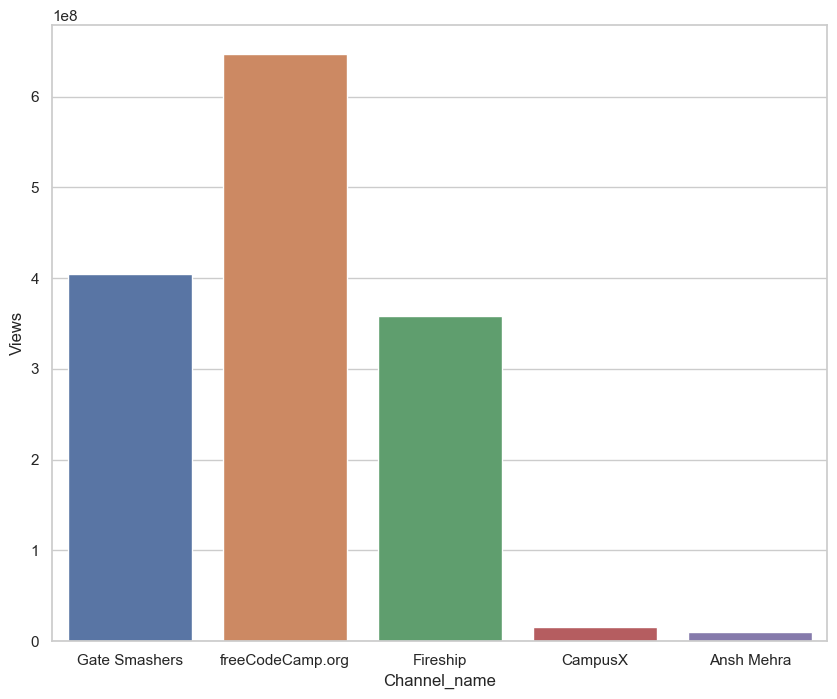

In [25]:
sns.set_style("whitegrid")
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

### 4.3 Video Count

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


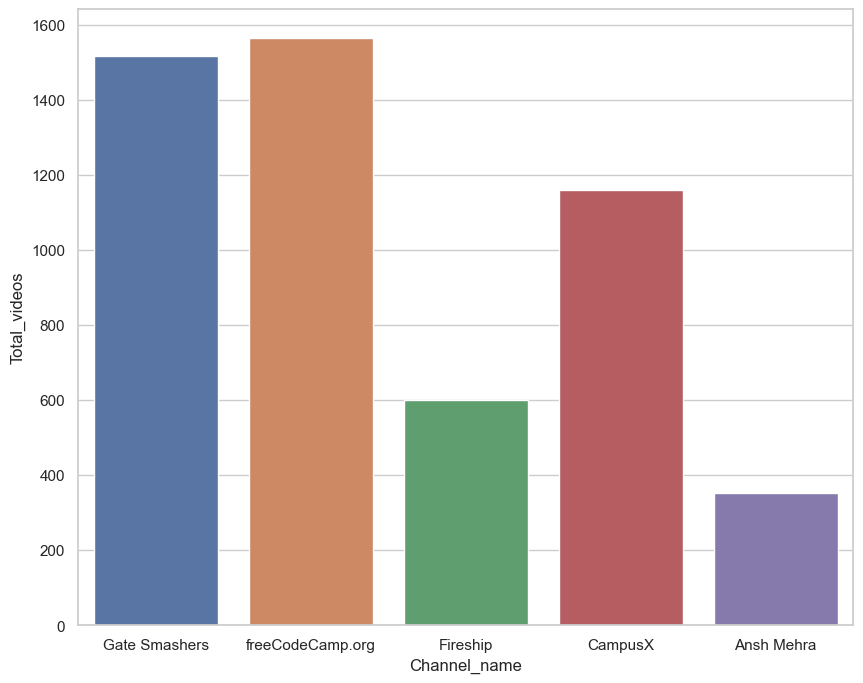

In [26]:
sns.set_style("whitegrid")
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

# 5: Retrieving Information from videos

In [27]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Gate Smashers,1730000,404343305,1516,UUJihyK0A38SZ6SdJirEdIOw
1,freeCodeCamp.org,8890000,646560059,1564,UU8butISFwT-Wl7EV0hUK0BQ
2,Fireship,2710000,357946403,600,UUsBjURrPoezykLs9EqgamOA
3,CampusX,150000,15342768,1159,UUCWi3hpnq_Pe03nGxuS7isg
4,Ansh Mehra,314000,9897493,351,UUZknyXD-6tETm9aN8GQCi8g


### 5.1 Choosing Channel

In [28]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='CampusX', 'playlist_id'].iloc[0]

### 5.2  Function to fetch video IDs

In [29]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

### 5.3 Fetching videos IDs

In [30]:
video_ids = get_video_ids(youtube, playlist_id)

In [31]:
video_ids

['H4fZ3HFv684',
 'CAlfPNOkweQ',
 'rj5V6q6-XUM',
 '1_bLnsNmhCI',
 'KiL74WsgxoA',
 '_J7HzClh4mo',
 'FkZQGhCzROk',
 '0Eo-_5bfers',
 '8fX3rOjTloc',
 'mELtxVUNNrw',
 'a0pa3cLFyic',
 'ToU414wge1k',
 'rPteUQ_3gxI',
 'k2NSm3MNdYg',
 'gmp2tS2joaA',
 'mlDkTrlLaio',
 'C6aDw4y8qJ0',
 'QQfZAoNGQmE',
 'gQzHDZCle24',
 'fiqo6uPCJVI',
 'Akv3poqqwI4',
 'z7IPBg6MyrU',
 '4p5EQtyxSyI',
 'Cs88FbH9sSU',
 'RpeE2r5QEps',
 '1jZm-9HNxGk',
 'QBFVcBXRzu4',
 'venF37V3AaU',
 'rIsCKVyh4dI',
 '2GV_ouHBw30',
 'ndHDsvqmbuI',
 'DUT4WEUngt0',
 'gdW6hj9IXaA',
 'HkDe1sqS8yw',
 'abnL_GUGub4',
 '5xWjleyItSY',
 '6-1WiITAW10',
 'hRTe7tSkR2k',
 'XGJLWJ0a6aU',
 'CyFW7wn41qk',
 '5Y4pWR1P8G0',
 'e_9vJXokd-Y',
 'aEPoLeS6UMM',
 '1ctqJCHMAmc',
 'mQewAJb8oJ8',
 'xHTMjxx14sU',
 'S94mx6OL7kM',
 'O0omBfGHYfs',
 'X52HK2qkiIE',
 '-WmJDYBor7c',
 'U6QCc_3zgUk',
 'ADqYqSdtyW8',
 'C_QAURbgBqY',
 '1ndVC500-EU',
 'Uv3Blie7F3g',
 'hysPNdlpXpI',
 'e0HQVOdfqlQ',
 'YgizUxmBFK8',
 '3LJ-yWBQBGs',
 'YYq47MN3TZI',
 's6xAVqYdmJ4',
 'nsKcmOly0UY',
 'kzMZDl

### 5.4 Function to get video details

In [32]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                              ## Likes = video['statistics']["likeCount"]
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

### 5.5 Fetching video details

In [33]:
video_details=get_video_details(youtube,video_ids)

### 5.5.1 Converting into DataFrame

In [34]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_date,Views
0,Why Should You Learn MLOps in 2024? | Software Systems Vs ML Systems | Machine Learning Operations,2023-12-31T08:36:36Z,17122
1,Data Science Roadmap for 2024 | 5 Levels | End-to-End Data Science Roadmap,2023-12-27T17:24:37Z,25001
2,Attention Mechanism in 1 video | Seq2Seq Networks | Encoder Decoder Architecture,2023-12-21T08:55:17Z,5435
3,DBSCAN Clustering Algorithms | Density Based Clustering | How DBSCAN Works | CampusX,2023-12-17T00:29:03Z,4335
4,Encoder Decoder | Sequence-to-Sequence Architecture | Deep Learning | CampusX,2023-12-10T03:40:52Z,7789
...,...,...,...
1020,Cumulative Distribution Function,2019-08-09T17:32:34Z,3418
1021,Probability Density Function,2019-08-09T17:28:10Z,5249
1022,Descriptive Statistics - Measures of Spread,2019-08-08T15:21:28Z,5751
1023,Descriptive Statistics - Measures of Central Tendency,2019-08-08T15:13:00Z,5824


### 5.5.2 Converting data into proper datatypes

In [35]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Month
0,Why Should You Learn MLOps in 2024? | Software Systems Vs ML Systems | Machine Learning Operations,2023-12-31,17122,Dec
1,Data Science Roadmap for 2024 | 5 Levels | End-to-End Data Science Roadmap,2023-12-27,25001,Dec
2,Attention Mechanism in 1 video | Seq2Seq Networks | Encoder Decoder Architecture,2023-12-21,5435,Dec
3,DBSCAN Clustering Algorithms | Density Based Clustering | How DBSCAN Works | CampusX,2023-12-17,4335,Dec
4,Encoder Decoder | Sequence-to-Sequence Architecture | Deep Learning | CampusX,2023-12-10,7789,Dec
...,...,...,...,...
1020,Cumulative Distribution Function,2019-08-09,3418,Aug
1021,Probability Density Function,2019-08-09,5249,Aug
1022,Descriptive Statistics - Measures of Spread,2019-08-08,5751,Aug
1023,Descriptive Statistics - Measures of Central Tendency,2019-08-08,5824,Aug


### 5.6 Reviewing top 10 videos

In [36]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [37]:
top10_videos

,Title,Published_date,Views,Month
331,Movie Recommender System Project | Content Based Recommender System with Heroku Deployment,2021-07-07,736089,Jul
71,Data Structures and Algorithms using Python | Mega Video | DSA in Python in 1 video,2023-01-17,402838,Jan
451,What is Machine Learning? | 100 Days of Machine Learning,2021-03-13,391698,Mar
240,Complete OOP in Python in 1 Video | End to End OOP in Python in 4 hours,2022-01-24,281055,Jan
268,Complete SQL Course For Data Science | SQL For Data Science in 6 Hrs,2021-10-26,203718,Oct
329,Email Spam Classifier | SMS Spam Classifier | End to End Project | Heroku Deployment,2021-07-10,200638,Jul
461,Car Price Predictor Project | Machine Learning | Linear Regression,2021-01-02,181690,Jan
190,Book Recommender System | Machine Learning Project | Collaborative Filtering Based Recommender Sys,2022-05-27,181525,May
233,100 Days of Deep Learning | Course Announcement,2022-02-15,142462,Feb
321,WhatsApp Chat Analysis Project | End to End Project with Heroku Deployment,2021-07-14,115199,Jul


### 5.6.1 Visualizing

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


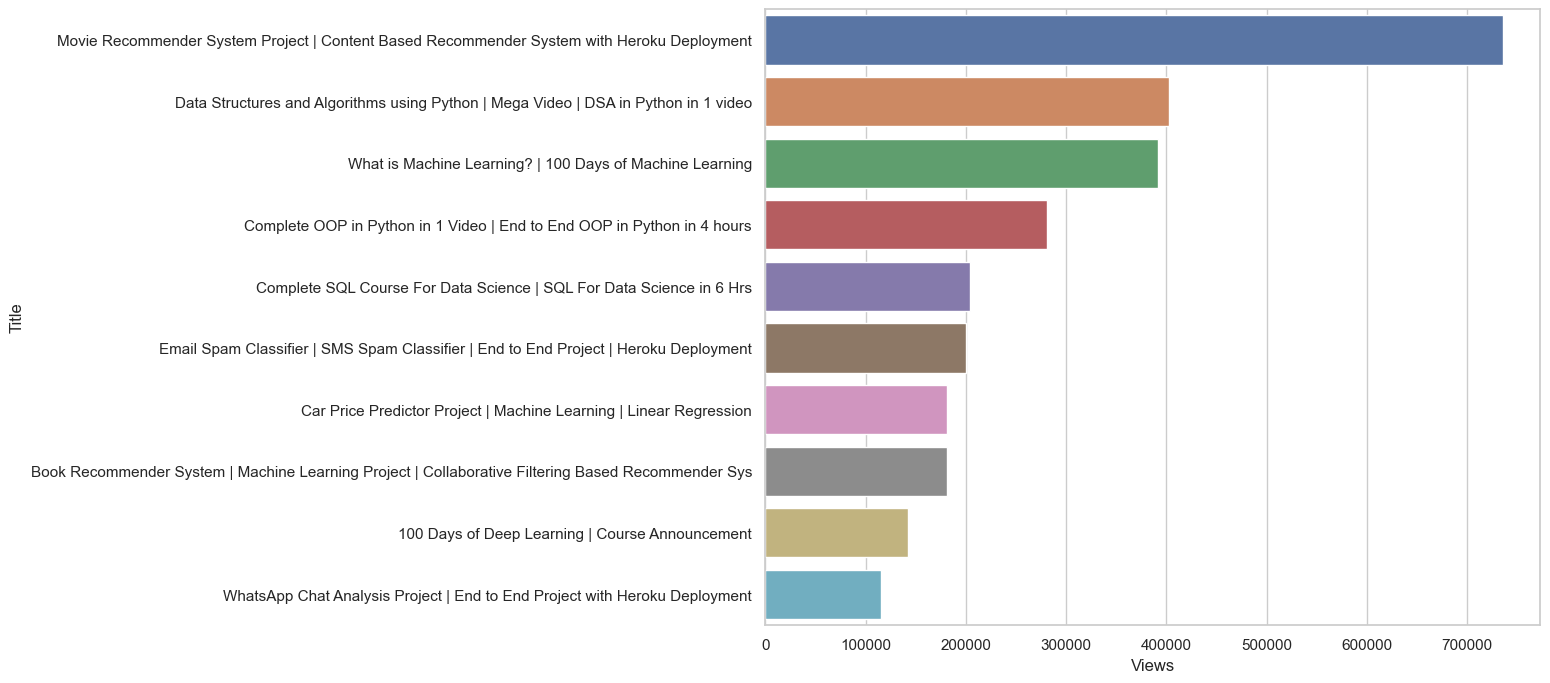

In [38]:
sns.set_style("whitegrid")
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

### 5.7 Number of videos launched on the basis of month

In [39]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [40]:
videos_per_month

,Month,size
0,Apr,49
1,Aug,97
2,Dec,46
3,Feb,68
4,Jan,42
5,Jul,72
6,Jun,130
7,Mar,169
8,May,139
9,Nov,56


In [41]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [42]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [43]:
videos_per_month = videos_per_month.sort_index()

### 5.7.1 Visualizing

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


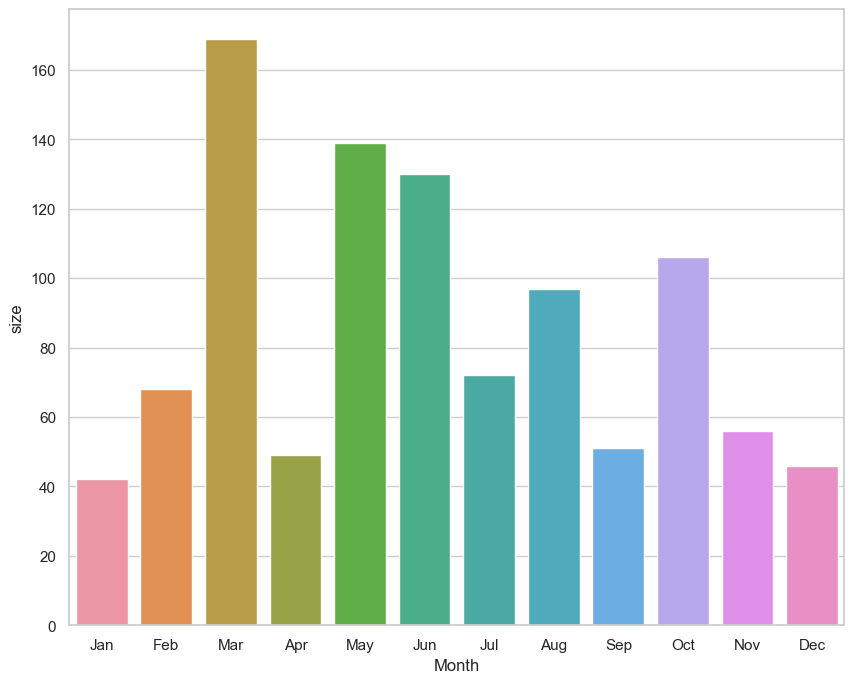

In [44]:
sns.set_style("whitegrid")
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

### 6 Exporting Data

In [45]:
video_data.to_csv('Video_Details(YouTuber Name).csv')

# 7 Comment Sentiment Analysis

### 7.1 Function for fetching Comments of a Video

In [49]:
request = youtube.commentThreads().list(
    part="snippet",
    videoId="H4fZ3HFv684",##put ID of video here
    maxResults=100,
    
)
response = request.execute()

comments = []


for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['textDisplay']
            ])


data = pd.DataFrame(comments, columns=['author','text'])

data.head(100)

,author,text
0,@nishantb80,"It&#39;s a very boring field. Back office, support type role... 24/7... Weekend work... You are like a production worker in a manufacturing plant...a 24/7 mechanic/security guard... There&#39;s nothing interesting in it😢"
1,@rakeshkumarsharma2250,"Hey awesome video ,when you are starting the playlist for mlops"
2,@amazing2541,❤❤❤
3,@rose9466,Sir please complete deep learning playlist on llm and then start with mlops
4,@user-wi5ei2zu4g,Thank you sir
...,...,...
95,@himanshurathod4086,nitishsir nlp ke ner and topic modelling
96,@yagndabhi2178,sir is data analytics is good option to study
97,@aamirimran9373,"Your teaching is exceptional, and I appreciate the effort you put into making the material engaging and understandable. Thank you for being such an effective and inspiring teacher.&quot;"
98,@himanshurathod4086,great teacher


### 7.2 Configuring Model and its requisites

In [50]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English. Model works on Pytorch.

### 7.3 Function to compute scores of Comments using the Model

In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

### 7.4 Passing the comments for score into the function

In [52]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['text']
        id=row['author']
        roberta_result = polarity_scores_roberta(text)
        finalresult={**roberta_result}
        res[id]=finalresult
    except RuntimeError:
        print(f'Broke')

100%|██████████| 100/100 [00:15<00:00,  6.57it/s]


### 7.5 Adding results to DataFrame

In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'author'})
results_df = results_df.merge(data, how='left')

In [54]:
results_df

,author,roberta_neg,roberta_neu,roberta_pos,text
0,@nishantb80,0.960559,0.034539,0.004903,"It&#39;s a very boring field. Back office, support type role... 24/7... Weekend work... You are like a production worker in a manufacturing plant...a 24/7 mechanic/security guard... There&#39;s nothing interesting in it😢"
1,@rakeshkumarsharma2250,0.001657,0.033042,0.965301,"Hey awesome video ,when you are starting the playlist for mlops"
2,@amazing2541,0.005155,0.073942,0.920902,❤❤❤
3,@rose9466,0.011248,0.755209,0.233543,Sir please complete deep learning playlist on llm and then start with mlops
4,@user-wi5ei2zu4g,0.005869,0.094899,0.899232,Thank you sir
...,...,...,...,...,...
95,@aamirimran9373,0.001578,0.010341,0.988081,"Your teaching is exceptional, and I appreciate the effort you put into making the material engaging and understandable. Thank you for being such an effective and inspiring teacher.&quot;"
96,@himanshurathod4086,0.003622,0.107710,0.888668,nitishsir nlp ke ner and topic modelling
97,@himanshurathod4086,0.003622,0.107710,0.888668,great teacher
98,@himanshurathod4086,0.003622,0.107710,0.888668,thank you for focusing on mlops


### 7.6 Evaluating results

In [55]:
results_df.describe()

,roberta_neg,roberta_neu,roberta_pos
count,100.000000,100.000000,100.000000
mean,0.059484,0.293994,0.646522
std,0.140874,0.313433,0.371842
min,0.000803,0.006624,0.004903
25%,0.002399,0.030118,0.229661
50%,0.006493,0.139975,0.845161
75%,0.038946,0.545841,0.968218
max,0.960559,0.938859,0.991875


### 7.7 Review Negative Comments

In [56]:
pd.set_option("max_colwidth",None)
neg_com=results_df[results_df['roberta_neg']>0.6]
neg_com

,author,roberta_neg,roberta_neu,roberta_pos,text
0,@nishantb80,0.960559,0.034539,0.004903,"It&#39;s a very boring field. Back office, support type role... 24/7... Weekend work... You are like a production worker in a manufacturing plant...a 24/7 mechanic/security guard... There&#39;s nothing interesting in it😢"


### 7.8 Visualizing

In [57]:
sentimentscore=results_df.drop(['author','text'],axis=1)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


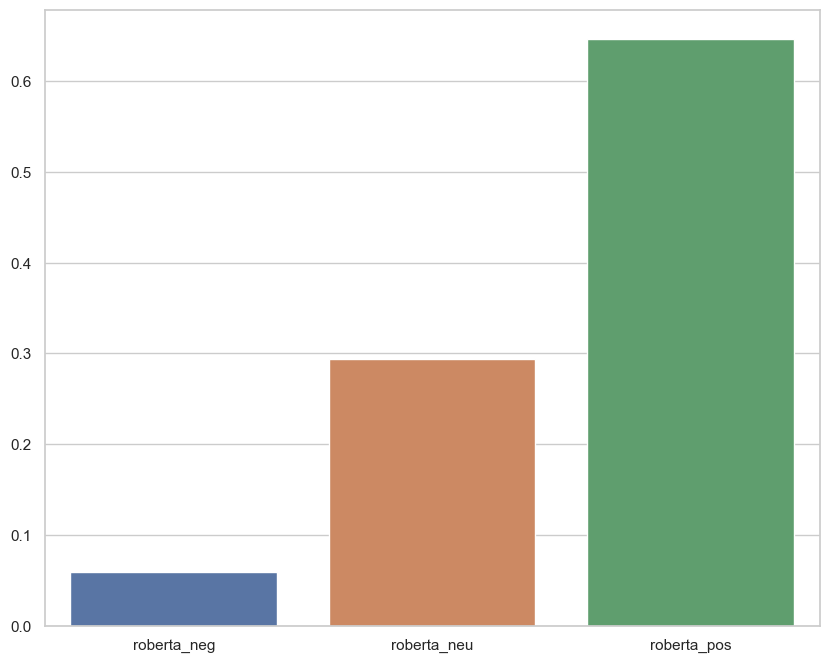

In [58]:
sns.set_style("whitegrid")
a=sns.barplot(x = sentimentscore.mean().index, y = sentimentscore.mean())